### IMEC2543 - DINAMICA DE MAQUINARIA
### [Luis Alejandro Rodríguez Arenas](https://luigitoby.github.io/) Cod. 202321287
# Taller 1

In [50]:
import numpy as np
from numpy import deg2rad
from sympy import symbols, pi, sin, cos, lambdify, solve, linear_eq_to_matrix, simplify
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, express
from scipy import optimize
from scipy.optimize import fsolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

# Paso -1 - Hacer los dibujos y diagramas necesarios


# Paso 0 -  Establecer variables
Vamos a establecer las variables que necesitaremos a lo largo del ejercicio

In [51]:
l1, l2, l3, l4, l5, l6, l7, l8, l9, l10, mJ, mK, mL, mM, mN, mO, mP, mQ, g, t = symbols('l1 l2 l3 l4 l5 l6 l7 l8 l9 l10 mJ mK mL mM mN mO mP mQ g t')

theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8 = dynamicsymbols('theta1 theta2 theta3 theta4 theta5 theta6 theta7 theta8')

# FOAx, FABx, FBCx, FDCx, FOAy, FABy, FBCy, FDCy, Finx, Min, FODy, M_pris = symbols('F_OAx F_ABx F_BCx F_DCx F_OAy F_ABy F_BCy F_DCy F_inx M_in F_ODx M_pris')
params={l1: 0.035, l2: 0.08, l3: 0.08, l4: 0.035, l5: 0.02, l6: 0.02, l7: 0.04, l8: 0.046254, l9: 0.01723, l10: 0.0361, mJ: 1, mK: 1, mL: 1, mM: 1, mN: 1, mO: 1, mP: 1, mQ: 1, g: 9.81}

T=ReferenceFrame('T')

J=T.orientnew('J','Axis',(theta1,T.z))
K=T.orientnew('K','Axis',(theta2,T.z))
L=T.orientnew('L','Axis',(theta3,T.z))
M=T.orientnew('M','Axis',(theta4,T.z))
N=T.orientnew('N','Axis',(theta5,T.z))
O=T.orientnew('O','Axis',(theta6,T.z))
P=T.orientnew('P','Axis',(theta7,T.z))
Q=T.orientnew('Q','Axis',(theta8,T.z))

V=N.orientnew('V','Axis',(deg2rad(95),T.z))

# W=N.orientnew('W','Axis',(-deg2rad(25.515),N.z))

rAB = l2*J.x
rAC = l1*K.x
rCD = l3*L.x
############
rBD = l3*P.x
rIB = l4*P.x
############
rIH = l5*Q.x
rHG = l3*O.x
############
rBF = l7*N.x
# rGF = l8*W.x
rBG = l6*V.x
##########
rEF = l3*M.x


eqLoop1 = rAB+rBD-rCD-rAC
eqLoop2 = rAB+rBF-rEF
eqLoop3 = rIH-rIB+rHG-rBG

eqLoop1 = eqLoop1.subs(params)
eqLoop2 = eqLoop2.subs(params)
eqLoop3 = eqLoop3.subs(params)

# Paso 1  - FK
Como hemos visto en clase el paso 1 es realizar el FK del mecanísmo, pues este nos permitirá en el futuro determinar la posición final del efector daondole los valores de valores de $\theta$, $\dot{\theta}$ y $\dot{\theta}$ 

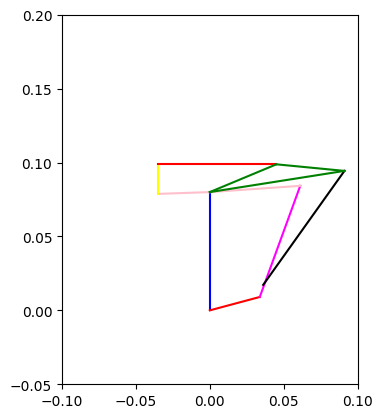

In [52]:
points={'A': 0*T.x, 'B': rAB, 'C': rAC, 'D': rAC+rCD, 'E': l10*T.x+l9*T.y, 'F': rAB-rIB+rIH+rHG-rBG+rBF, 'G': rAB-rIB+rIH+rHG, 'H': rAB-rIB+rIH, 'I': rAB-rIB}
points_fun={k:lambdify([theta1,theta2,theta3,theta4,theta5,theta6,theta7,theta8],[v.dot(T.x).subs(params),v.dot(T.y).subs(params)]) for k,v in points.items()}

def plotMechanism(joint_values,ax=None):    
    A=points_fun['A'](*joint_values) # Operador de unpacking, es decir, toma la lista de joint_values y los pasa como argumentos a la función de cada punto
    B=points_fun['B'](*joint_values)
    C=points_fun['C'](*joint_values)
    D=points_fun['D'](*joint_values)
    E=points_fun['E'](*joint_values)
    F=points_fun['F'](*joint_values)
    G=points_fun['G'](*joint_values)
    H=points_fun['H'](*joint_values)
    I=points_fun['I'](*joint_values)    

    if ax is None:
        ax=plt.figure().add_subplot(111)
    ax.plot([A[0],B[0]], [A[1],B[1]], 'BLUE')
    ax.plot([A[0],C[0]], [A[1],C[1]], 'red')
    ax.plot([C[0],D[0]], [C[1],D[1]], 'magenta')
    ax.plot([B[0],D[0]], [B[1],D[1]], 'pink')
    ax.plot([B[0],I[0]], [B[1],I[1]], 'pink')
    ax.plot([I[0],H[0]], [I[1],H[1]], 'yellow')
    ax.plot([H[0],G[0]], [H[1],G[1]], 'red')
    ax.plot([G[0],B[0]], [G[1],B[1]], 'green')
    ax.plot([E[0],F[0]], [E[1],F[1]], 'black') 
    ax.plot([B[0],F[0]], [B[1],F[1]], 'green')
    ax.plot([G[0],F[0]], [G[1],F[1]], 'green')

    
    ax.set_aspect('equal')
    ax.set_xlim(-0.1,0.1)
    ax.set_ylim(-0.05,0.2)

# Chekeo rápido para ver si funciona la función de plot
plotMechanism([np.deg2rad(90),np.deg2rad(15),np.deg2rad(70),np.deg2rad(0000),np.deg2rad(20),np.deg2rad(0),np.deg2rad(2),np.deg2rad(90)])


In [53]:
# entradas (DOF)
theta_in = (theta1, theta2)

# incógnitas
theta_u = (theta3, theta4, theta5, theta6, theta7, theta8)

eqs = [
    eqLoop1.dot(T.x),
    eqLoop1.dot(T.y),
    eqLoop2.dot(T.x),
    eqLoop2.dot(T.y),
    eqLoop3.dot(T.x),
    eqLoop3.dot(T.y)
]

eqs_fun = lambdify(
    (theta1, theta2, theta3, theta4, theta5, theta6, theta7, theta8),
    eqs,
    modules='numpy'
)


def FK_residual(theta_u_vals, theta1_val, theta2_val):
    return np.array(
        eqs_fun(
            theta1_val,
            theta2_val,
            *theta_u_vals
        ),
        dtype=float
    )

def FK(theta1_val, theta2_val, guess):
    sol, info, ier, msg = fsolve(
        FK_residual,
        x0=guess,
        args=(theta1_val, theta2_val),
        full_output=True,
        maxfev=100000000,     # ← MÁS iteraciones
        xtol=1e-3       # ← tolerancia más estricta
    )
    
    if ier != 1:
        raise RuntimeError("No convergió FK: " + msg)
    
    return sol



In [54]:
guess = [
    np.deg2rad(70),
    np.deg2rad(0),
    np.deg2rad(20),
    np.deg2rad(0),
    np.deg2rad(2),
    np.deg2rad(90)
]

theta1_val = np.deg2rad(90)
theta2_val = np.deg2rad(90)

theta_u_sol = FK(theta1_val, theta2_val, guess)

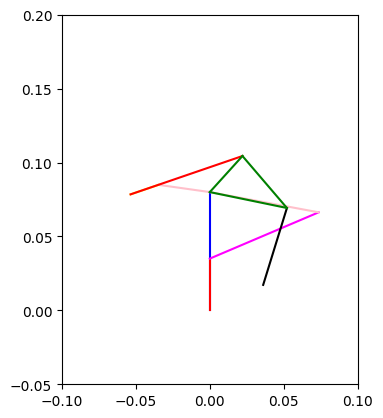

In [55]:
joint_values = [
    theta1_val,
    theta2_val,
    *theta_u_sol
]

plotMechanism(joint_values)
plt.show()


In [69]:
from scipy.optimize import minimize

def FK_cost(theta_u_vals, theta1_val, theta2_val):
    r = FK_residual(theta_u_vals, theta1_val, theta2_val)
    return np.dot(r, r)   # ||r||^2

def FK(theta1_val, theta2_val, guess):
    res = minimize(
        FK_cost,
        x0=guess,
        args=(theta1_val, theta2_val),
        method='BFGS',        # muy bueno para esto
        options={
            'maxiter': 500000,
            'gtol': 1e-3,
            'disp': False
        }
    )
    
    if not res.success:
        print("Costo final:", res.fun)
        raise RuntimeError("FK no convergió: " + res.message)
    
    return res.x



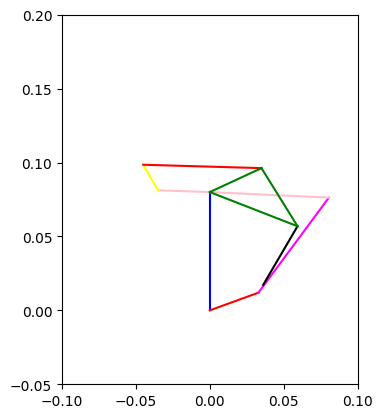

In [70]:
guess = [
    np.deg2rad(70),
    np.deg2rad(0),
    np.deg2rad(20),
    np.deg2rad(0),
    np.deg2rad(2),
    np.deg2rad(90)
]

theta1_val = np.deg2rad(90)
theta2_val = np.deg2rad(20)

theta_u_sol = FK(theta1_val, theta2_val, guess)

joint_values = [theta1_val, theta2_val, *theta_u_sol]
plotMechanism(joint_values)
plt.show()


In [58]:
r_final = FK_residual(theta_u_sol, theta1_val, theta2_val)
print("Residual final:", r_final)
print("Norma:", np.linalg.norm(r_final))

Residual final: [-0.0005728   0.00102524 -0.01238758 -0.00700917  0.02566431 -0.00150353]
Norma: 0.029408800855532272


In [59]:
def FK(q, z0=None, check=True):
    theta1, x = q

    if z0 is None:
        z0 = [np.deg2rad(45), np.deg2rad(20)]

    fsolve_fun = lambda z: eq_fun(theta1, z[0], z[1], x)
    z, info, ier, msg = fsolve(fsolve_fun, z0, full_output=True)
    
    # print("ier:", ier)
    # print("msg:", msg)
    # print("residuo:", info["fvec"])
    
    if check and ier != 1:
        raise RuntimeError(f"FK no convergió: {msg}")

    return z

In [60]:
def drawFK(theta1, x):
    theta2, theta3 = FK([theta1, x])
    plotMechanism([theta1, theta2, theta3, x])
    print(theta2, theta3)
drawFK(np.deg2rad(50), 0.7)

NameError: name 'eq_fun' is not defined

# Paso 2 - Dinámica Inversa
En dinámica las incognitas son los momentos y fuerzas, por la cantidad de cuerpos (4) podemos entonces encontar 12 ecuaciones en el sistema, las cuales tenemos que escribir.

In [ ]:
points={'O':0*N.x,'P':r1,'Q':r1+r2,'R':r1+r2+r3,'S':r1+l4*B.y}

com = {'A': r1/2, 
       'B': r1+(l2/3)*B.x+(l4/3)*B.y, 
       'C': r1+r2+(r3/2), 
       'D': r1+r2+r3 # Asumo que este es puntual
       }


acc_old = {
    'A': com['A'].diff(t, N).diff(t, N),
    'B': com['B'].diff(t, N).diff(t, N),
    'C': com['C'].diff(t, N).diff(t, N),
    'D': com['D'].diff(t, N).diff(t, N)

}

acc = {
    k: v.express(N).diff(t, N).diff(t, N)
    for k, v in com.items()
}

weights = {
    'A': -ma*g*N.y,
    'B': -mb*g*N.y,
    'C': -mc*g*N.y,
    'D': -md*g*N.y
}

inertia_G = {
    'A': (1/12)*ma*l1**2,
    'B': (1/18)*mb*(l2**2 + l4**2),  # triángulo plano (aprox razonable)
    'C': (1/12)*mc*l3**2,
    'D': 0
}

alpha = {
    'A': A.ang_acc_in(N).dot(N.z),
    'B': B.ang_acc_in(N).dot(N.z),
    'C': C.ang_acc_in(N).dot(N.z),
    'D': 0
}



In [ ]:
C.ang_acc_in(N).dot(N.z)

Derivative(theta1(t), (t, 2)) - Derivative(theta2(t), (t, 2)) - Derivative(theta3(t), (t, 2))

In [ ]:
FOA = FOAx*N.x + FOAy*N.y
FAB = FABx*N.x + FABy*N.y
FBC = FBCx*N.x + FBCy*N.y
FDC = FDCx*N.x + FDCy*N.y

r_GA_O = points['O'] - com['A']
r_GA_P = points['P'] - com['A']

r_GB_P = points['P'] - com['B']
r_GB_Q = points['Q'] - com['B']

r_GC_Q = points['Q'] - com['C']
r_GC_R = points['R'] - com['C']

r_GD_R = points['R'] - com['D']

In [ ]:
# Cuerpo A
eqFAx = FOAx - FABx - ma * acc['A'].dot(N.x)
eqFAy = FOAy - FABy + weights['A'].dot(N.y) - ma * acc['A'].dot(N.y)
eqMA = Min + r_GA_O.cross(FOA).dot(N.z) + r_GA_P.cross(-FAB).dot(N.z) - inertia_G['A'] * alpha['A']
# Cuerpo B
eqFBx = FABx -FBCx - mb * acc['B'].dot(N.x)
eqFBy = FABy -FBCy + weights['B'].dot(N.y) - mb * acc['B'].dot(N.y)
eqMB = r_GB_P.cross(FAB).dot(N.z) + r_GB_Q.cross(-FBC).dot(N.z) - inertia_G['B'] * alpha['B']

# Cuerpo C
eqFCx = FBCx + FDCx - mc * acc['C'].dot(N.x)
eqFCy = FBCy + FDCy + weights['C'].dot(N.y) - mc * acc['C'].dot(N.y)
eqMC = r_GC_Q.cross(FBC).dot(N.z) + r_GC_R.cross(FDC).dot(N.z) - inertia_G['C'] * alpha['C']

# Cuerpo D
eqFDx = Finx -FDCx - md * acc['D'].dot(N.x)
eqFDy = FODy -FDCy + weights['D'].dot(N.y) - md * acc['D'].dot(N.y)
eqMD = M_pris + r_GD_R.cross(-FDC).dot(N.z) - inertia_G['D'] * alpha['D'] # La verdad no importa mucho



In [ ]:
eqList = [
    eqFAx, eqFAy, eqMA,
    eqFBx, eqFBy, eqMB,
    eqFCx, eqFCy, eqMC,
    eqFDx, eqFDy, eqMD
]


In [ ]:
unknowns = [
    FOAx, FOAy,
    FABx, FABy,
    FBCx, FBCy,
    FDCx, FDCy,
    FODy, Finx,
    Min, M_pris
]

In [ ]:
FF, bf = linear_eq_to_matrix(eqList, unknowns)

In [ ]:
FF.subs(params)

Matrix([
[                 1,                   0,                                                                                                                                                -1,                                                                                                                                                  0,                                                                                                                                                                        0,                                                                                                                                                                         0,                                                                                                                                                                       0,                                                                                                                                                 

In [ ]:
bf.subs(params)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [ ]:
FF.shape, bf.shape


((12, 12), (12, 1))

# Paso 2.1 - Dinámica Inversa + FK
Vamos a resolver para las incognitas, pero debemos primero calcular los theetas

In [ ]:
dtheta1 = theta1.diff()
dtheta2 = theta2.diff()
dtheta3 = theta3.diff()

ddtheta1 = theta1.diff(t,2)
ddtheta2 = theta2.diff(t,2)
ddtheta3 = theta3.diff(t,2)

dx = x.diff()
ddx = x.diff(t,2)


In [ ]:
start_angle = deg2rad(50)
end_angle = deg2rad(75)
dtheta1_val = 3
tiempo = (end_angle - start_angle) / dtheta1_val
delta = end_angle - start_angle
print(delta)
tt = np.linspace(0,tiempo,100)

theta1_val = np.linspace(start_angle, end_angle, 100)

x_val = 0.7+0.05*np.sin(5*tt)

# Inicializamos resultados
theta2_val = []
theta3_val = []

# Semilla inicial
# z0_current = [np.deg2rad(-50), np.deg2rad(20)]
z0_current = [-0.5, 2]

for i in range(len(tt)):
    theta1_i = theta1_val[i]
    x_i = x_val[i]

    try:
        # Llamamos a FK con z0 actualizado
        z_next = FK([theta1_i, x_i], z0=z0_current)
    except RuntimeError as e:
        print(f"No convergió en i={i}, theta1={theta1_i:.3f}, x={x_i:.3f}")
        # Opcional: usar z0 anterior como "fallback"
        z_next = z0_current

    # Guardamos resultado
    theta2_val.append(z_next[0])
    theta3_val.append(z_next[1])

    # Actualizamos z0 para la siguiente iteración
    z0_current = z_next

theta2_val = np.array(theta2_val)
theta3_val = np.array(theta3_val)

0.43633231299858244


In [ ]:
for i in range(5):
    print(f"{i}: theta1={theta1_val[i]:.3f}, x={x_val[i]:.3f}, theta2={theta2_val[i]:.3f}, theta3={theta3_val[i]:.3f}")


0: theta1=0.873, x=0.700, theta2=-0.521, theta3=1.825
1: theta1=0.877, x=0.700, theta2=-0.509, theta3=1.818
2: theta1=0.881, x=0.701, theta2=-0.496, theta3=1.810
3: theta1=0.886, x=0.701, theta2=-0.484, theta3=1.803
4: theta1=0.890, x=0.701, theta2=-0.471, theta3=1.795


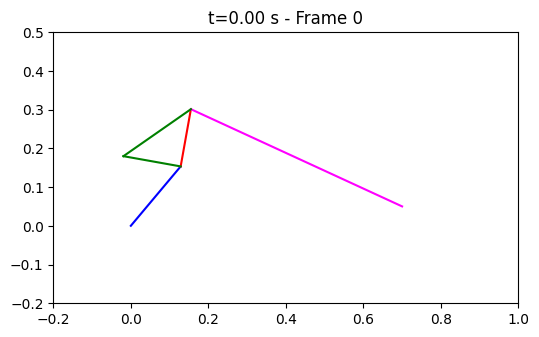

In [ ]:
# Asegurarte de que los resultados están en arrays

fig, ax = plt.subplots(figsize=(6,6))

def update(i):
    ax.clear()
    # plotMechanism recibe [theta1, theta2, theta3, x]
    plotMechanism([theta1_val[i], theta2_val[i], theta3_val[i], x_val[i]], ax)
    ax.set_title(f"t={tt[i]:.2f} s - Frame {i}")
    ax.set_aspect('equal')
    
anim = animation.FuncAnimation(fig, update, frames=len(tt), repeat=False, interval=100)

# Mostrar como animación JS
HTML(anim.to_jshtml())


In [ ]:
theta1_val = np.linspace(start_angle, end_angle, 100)
x_val = 0.7+.005*np.sin(5*tt)


dtheta1_val = np.full(100, 3)
dtheta2_val = np.gradient(theta2_val, tt, edge_order=2)
dtheta3_val = np.gradient(theta3_val, tt, edge_order=2)
dx_val = np.gradient(x_val, tt, edge_order=2)

ddtheta1_val = np.zeros(100)
ddtheta2_val = np.gradient(dtheta2_val, tt, edge_order=2)
ddtheta3_val = np.gradient(dtheta3_val, tt, edge_order=2)
ddx_val = np.gradient(dx_val, tt, edge_order=2)

In [ ]:
# Vector de posiciones
q_list = np.column_stack((theta1_val, theta2_val, theta3_val, x_val))

# Vector de velocidades
q_dot_list = np.column_stack((
    np.full_like(theta1_val, 3.0),  # theta1 constante
    dtheta2_val,
    dtheta3_val,
    dx_val
))

# Vector de aceleraciones
q_ddot_list = np.column_stack((
    np.zeros_like(theta1_val),  # ddtheta1 = 0
    ddtheta2_val,
    ddtheta3_val,
    ddx_val
))


In [ ]:
# Sustituir valores numéricos (incluyendo thetas)
FF_num = FF.subs(params)
bf_num = bf.subs(params)

# Resolver sistema lineal
sol = FF_num.LUsolve(bf_num)

# Asociar resultados con incógnitas
solution_dict = dict(zip(unknowns, sol))

solution_dict


{F_OAx: -1.2*(sin(theta1(t))*sin(theta2(t)) + cos(theta1(t))*cos(theta2(t)))*sin(theta3(t))*Derivative(theta3(t), (t, 2)) - 1.2*(sin(theta1(t))*sin(theta2(t)) + cos(theta1(t))*cos(theta2(t)))*cos(theta3(t))*Derivative(theta3(t), t)**2 + 1.2*(-sin(theta1(t))*cos(theta2(t)) + sin(theta2(t))*cos(theta1(t)))*sin(theta3(t))*Derivative(theta3(t), t)**2 - 1.2*(-sin(theta1(t))*cos(theta2(t)) + sin(theta2(t))*cos(theta1(t)))*cos(theta3(t))*Derivative(theta3(t), (t, 2)) - 2.4*(-sin(theta1(t))*sin(theta2(t))*Derivative(theta1(t), t) + sin(theta1(t))*sin(theta2(t))*Derivative(theta2(t), t) - cos(theta1(t))*cos(theta2(t))*Derivative(theta1(t), t) + cos(theta1(t))*cos(theta2(t))*Derivative(theta2(t), t))*cos(theta3(t))*Derivative(theta3(t), t) - 2.4*(-sin(theta1(t))*cos(theta2(t))*Derivative(theta1(t), t) + sin(theta1(t))*cos(theta2(t))*Derivative(theta2(t), t) + sin(theta2(t))*cos(theta1(t))*Derivative(theta1(t), t) - sin(theta2(t))*cos(theta1(t))*Derivative(theta2(t), t))*sin(theta3(t))*Derivative

In [ ]:
solution_dict[Min]

Min_fin = lambdify([theta1, theta2, theta3, x, dtheta1, dtheta2, dtheta3, dx, ddtheta1, ddtheta2, ddtheta3, ddx], solution_dict[Min])

Min_fin(theta1_val[0], theta2_val[0], theta3_val[0], x_val[0], dtheta1_val[0], dtheta2_val[0], dtheta3_val[0], dx_val[0], ddtheta1_val[0], ddtheta2_val[0], ddtheta3_val[0], ddx_val[0])

np.float64(5.273376103744065)

In [ ]:
Min_time = Min_fin(
    theta1_val,
    theta2_val,
    theta3_val,
    x_val,
    dtheta1_val,
    dtheta2_val,
    dtheta3_val,
    dx_val,
    ddtheta1_val,
    ddtheta2_val,
    ddtheta3_val,
    ddx_val
)

In [ ]:
M_promedio = np.mean(Min_time)

In [ ]:
print("Torque promedio:", np.mean(Min_time))
print("Torque máximo:", np.max(Min_time))
print("Torque mínimo:", np.min(Min_time))

Torque promedio: 2.939532890999823
Torque máximo: 5.273376103744065
Torque mínimo: 0.5517195847886428


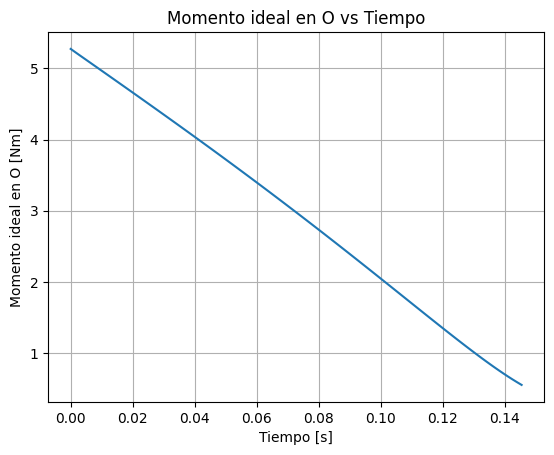

In [ ]:
plt.figure()
plt.plot(tt, Min_time)
plt.xlabel("Tiempo [s]")
plt.ylabel("Momento ideal en O [Nm]")
plt.title("Momento ideal en O vs Tiempo")
plt.grid()
plt.show()


In [ ]:
solution_dict[Finx]

Finx_fin = lambdify([theta1, theta2, theta3, x, dtheta1, dtheta2, dtheta3, dx, ddtheta1, ddtheta2, ddtheta3, ddx], solution_dict[Finx])

Finx_fin(theta1_val[0], theta2_val[0], theta3_val[0], x_val[0], dtheta1_val[0], dtheta2_val[0], dtheta3_val[0], dx_val[0], ddtheta1_val[0], ddtheta2_val[0], ddtheta3_val[0], ddx_val[0])

np.float64(1.2010471675369667)

In [ ]:
Finx_time = Finx_fin(
    theta1_val,
    theta2_val,
    theta3_val,
    x_val,
    dtheta1_val,
    dtheta2_val,
    dtheta3_val,
    dx_val,
    ddtheta1_val,
    ddtheta2_val,
    ddtheta3_val,
    ddx_val
)

In [ ]:
print("Fuerza promedio:", np.mean(Finx_time))
print("Fuerza máxima:", np.max(Finx_time))
print("Fuerza mínima:", np.min(Finx_time))

Fuerza promedio: -4.400111110672469
Fuerza máxima: 1.2010471675369667
Fuerza mínima: -7.720471944345283


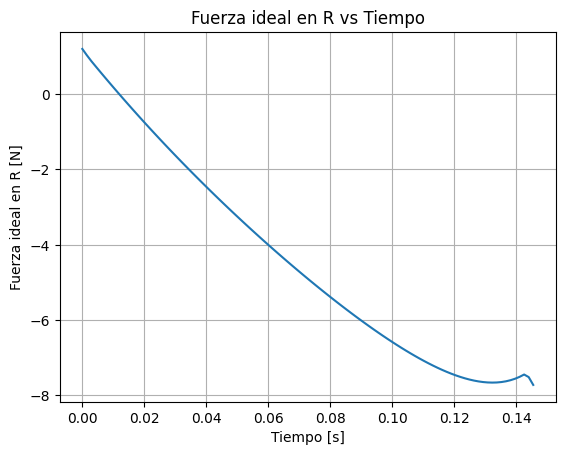

In [ ]:
plt.figure()
plt.plot(tt, Finx_time)
plt.xlabel("Tiempo [s]")
plt.ylabel("Fuerza ideal en R [N]")
plt.title("Fuerza ideal en R vs Tiempo")
plt.grid()
plt.show()


# Paso 3 - Dinámica Directa

In [ ]:
eqLoopdot = eqLoop.diff(t, N)
eqLoopddot = eqLoopdot.diff(t, N)

eqVel = [
    eqLoopdot.dot(N.x),
    eqLoopdot.dot(N.y)
]

eqVelParams = [expr.subs(params) for expr in eqVel]

eq_vel_fun = lambdify(
    [theta1, theta2, theta3, x,
     theta1.diff(t), theta2.diff(t), theta3.diff(t), x.diff(t)],
    eqVelParams
)

eqAcc = [
    eqLoopddot.dot(N.x),
    eqLoopddot.dot(N.y)
]

eqAccParams = [expr.subs(params) for expr in eqAcc]

eq_acc_fun = lambdify(
    [
        theta1, theta2, theta3, x,
        theta1.diff(t), theta2.diff(t), theta3.diff(t), x.diff(t),
        theta1.diff(t,2), theta2.diff(t,2), theta3.diff(t,2), x.diff(t,2)
    ],
    eqAccParams
)



In [ ]:
def FA(theta1_val, theta2_val, theta3_val, x_val,
       dtheta1_val, dtheta2_val, dtheta3_val, dx_val,
       ddtheta1_val, ddx_val,
       z0=None):

    if z0 is None:
        z0 = [0.0, 0.0]

    def acc_eq(z):
        ddtheta2_val, ddtheta3_val = z

        return eq_acc_fun(
            theta1_val, theta2_val, theta3_val, x_val,
            dtheta1_val, dtheta2_val, dtheta3_val, dx_val,
            ddtheta1_val, ddtheta2_val, ddtheta3_val, ddx_val
        )

    sol = fsolve(acc_eq, z0)
    return sol


In [ ]:
def FV(theta1_val, theta2_val, theta3_val, x_val,
       dtheta1_val, dx_val,
       z0=None):

    if z0 is None:
        z0 = [0.0, 0.0]

    def vel_eq(z):
        dtheta2_val, dtheta3_val = z

        return eq_vel_fun(
            theta1_val, theta2_val, theta3_val, x_val,
            dtheta1_val, dtheta2_val, dtheta3_val, dx_val
        )

    sol = fsolve(vel_eq, z0)
    return sol


In [ ]:
unknowns_fd = [
    FOAx, FOAy,
    FABx, FABy,
    FBCx, FBCy,
    FDCx, FDCy,
    FODy, Finx,
    ddtheta1,   # ← ahora es incógnita
    M_pris
]


In [ ]:
FF_fd, bf_fd = linear_eq_to_matrix(eqList, unknowns_fd)


In [ ]:
FF_fd = FF_fd.subs(params)
bf_fd = bf_fd.subs(params)


In [ ]:
FF_fd_fun = lambdify(
    [theta1, theta2, theta3, x,
     dtheta1, dtheta2, dtheta3, dx,
     Min, ddtheta2, ddtheta3, ddx],
    FF_fd,
    modules="numpy"
)

bf_fd_fun = lambdify(
    [theta1, theta2, theta3, x,
     dtheta1, dtheta2, dtheta3, dx,
     Min, ddtheta2, ddtheta3, ddx],
    bf_fd,
    modules="numpy"
)


In [ ]:
def dynamics(y, t):

    theta1_val = float(y[0])
    omega1_val = float(y[1])

    # Movimiento impuesto del deslizador
    x_val = 0.7 + 0.05*np.sin(5*t)
    dx_val = 0.05*5*np.cos(5*t)
    ddx_val = -0.05*25*np.sin(5*t)

    theta2_val, theta3_val = FK([theta1_val, x_val])

    dtheta2_val, dtheta3_val = FV(
        theta1_val,
        theta2_val,
        theta3_val,
        x_val,
        omega1_val,
        dx_val
    )

    A_num = FF_fd_fun(
        theta1_val, theta2_val, theta3_val, x_val,
        omega1_val, dtheta2_val, dtheta3_val, dx_val,
        M_promedio, 0.0, 0.0, ddx_val
    )

    b_num = bf_fd_fun(
        theta1_val, theta2_val, theta3_val, x_val,
        omega1_val, dtheta2_val, dtheta3_val, dx_val,
        M_promedio, 0.0, 0.0, ddx_val
    )

    A_num = np.array(A_num, dtype=float)
    b_num = np.array(b_num, dtype=float).flatten()

    sol = np.linalg.solve(A_num, b_num)

    ddtheta1_val = float(sol[10])

    ddtheta2_val, ddtheta3_val = FA(
        theta1_val,
        theta2_val,
        theta3_val,
        x_val,
        omega1_val,
        dtheta2_val,
        dtheta3_val,
        dx_val,
        ddtheta1_val,
        ddx_val
    )

    A_num = FF_fd_fun(
        theta1_val, theta2_val, theta3_val, x_val,
        omega1_val, dtheta2_val, dtheta3_val, dx_val,
        M_promedio, ddtheta2_val, ddtheta3_val, ddx_val
    )

    b_num = bf_fd_fun(
        theta1_val, theta2_val, theta3_val, x_val,
        omega1_val, dtheta2_val, dtheta3_val, dx_val,
        M_promedio, ddtheta2_val, ddtheta3_val, ddx_val
    )

    A_num = np.array(A_num, dtype=float)
    b_num = np.array(b_num, dtype=float).flatten()

    sol = np.linalg.solve(A_num, b_num)

    ddtheta1_val = float(sol[10])

    return [omega1_val, ddtheta1_val]


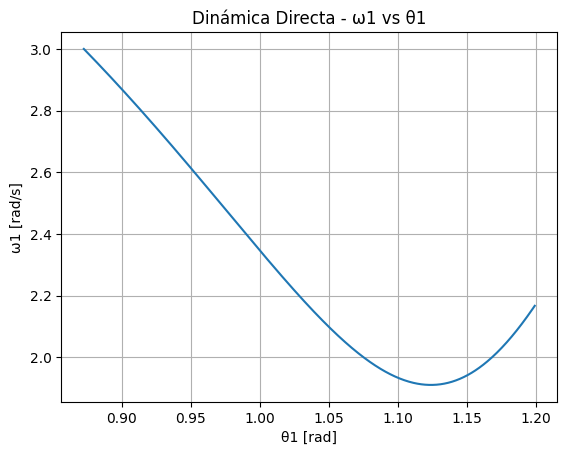

In [ ]:
from scipy.integrate import odeint

y0 = [start_angle, 3.0]

t_sim = np.linspace(0, tiempo, 500)

sol_dir = odeint(dynamics, y0, t_sim)

theta1_dir = sol_dir[:,0]
omega1_dir = sol_dir[:,1]

plt.figure()
plt.plot(theta1_dir, omega1_dir)
plt.xlabel("θ1 [rad]")
plt.ylabel("ω1 [rad/s]")
plt.title("Dinámica Directa - ω1 vs θ1")
plt.grid()
plt.show()


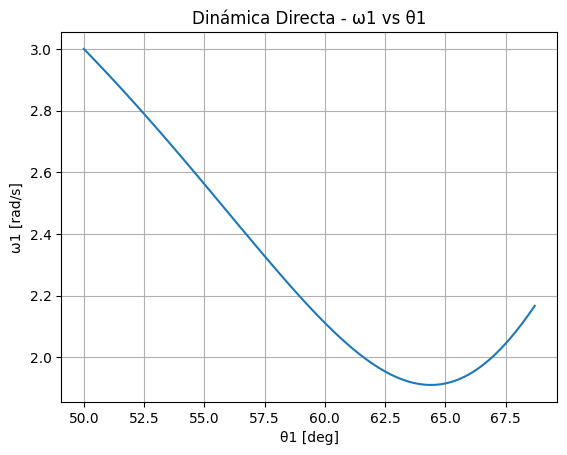

In [ ]:
from scipy.integrate import odeint
from numpy import rad2deg

y0 = [start_angle, 3.0]

t_sim = np.linspace(0, tiempo, 100)

sol_dir = odeint(dynamics, y0, t_sim)

theta1_dir = sol_dir[:,0]
omega1_dir = sol_dir[:,1]

plt.figure()
plt.plot(rad2deg(theta1_dir), omega1_dir)
plt.xlabel("θ1 [deg]")
plt.ylabel("ω1 [rad/s]")
plt.title("Dinámica Directa - ω1 vs θ1")
plt.grid()
plt.show()
